# **El precio de los autos**

Michelle Yareni Morales Ramón A01552627



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/My Drive/IA_concentracion/portafolio/precios_autos.csv')

Mounted at /content/gdrive


In [3]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# **Exploracion de la base de datos**

Medidas estadísticas de variables cuantitativas

In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Variables cuantitativas

**Boxplots**

En los boxplot se puede identificar que la mayoría de las variables tienen algunos datos atípicos, pero pocas variables tienen datos extremos.

Otra obervación es que hay variables que tienen escalas bastante diferente entre sí.

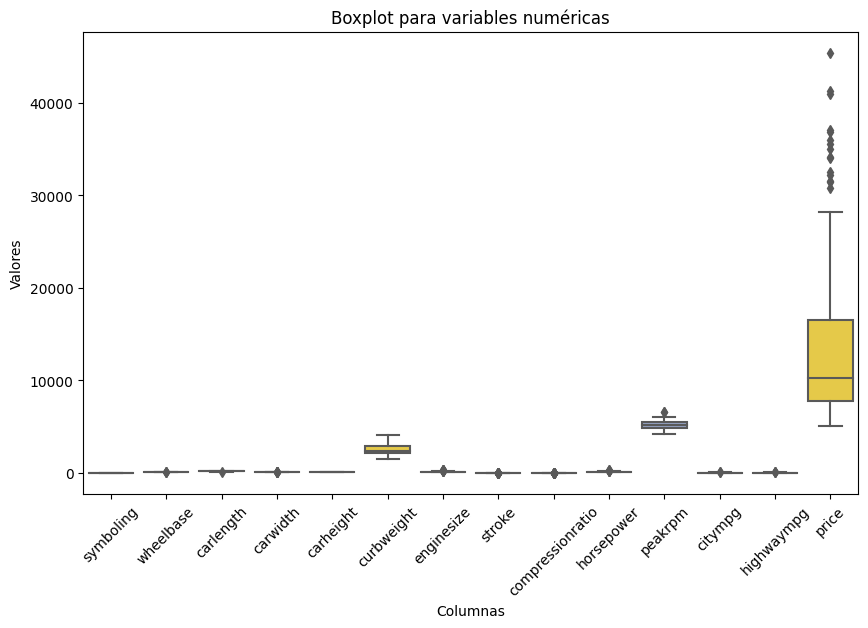

In [5]:
num_columns = df.select_dtypes(include=['int', 'float']).columns
#columns_for_boxplots = [col for col in num_columns if col not in ['price','peakrpm','curbweight']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_columns], palette="Set2")
plt.title("Boxplot para variables numéricas")
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

Para ver mejor los boxplots, se separaron las variables con escalas similares para graficarlas.

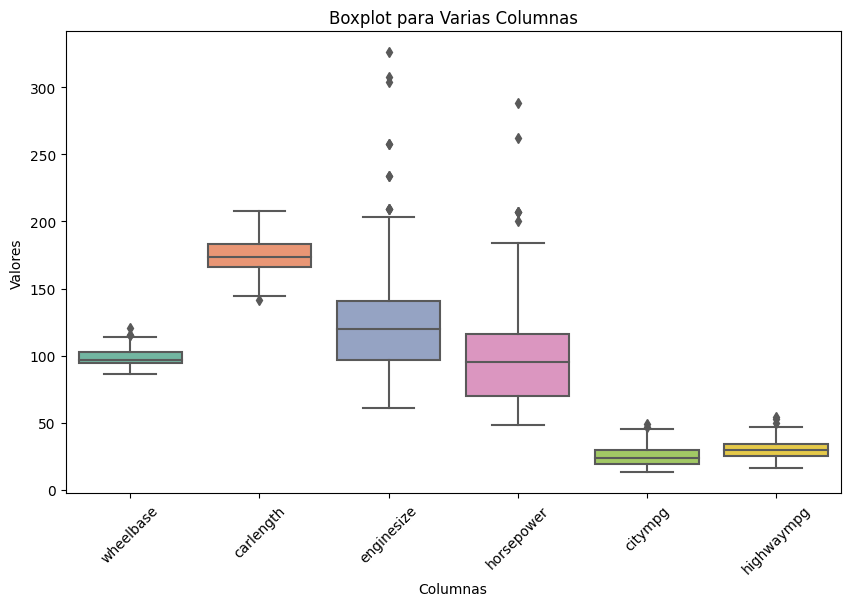

In [6]:
num_columns = df.select_dtypes(include=['int', 'float']).columns
col1 = [col for col in num_columns if col not in ['price','peakrpm','curbweight','symboling','carwidth','carheight','stroke','compressionratio']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[col1], palette="Set2")
plt.title("Boxplot para Varias Columnas")
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

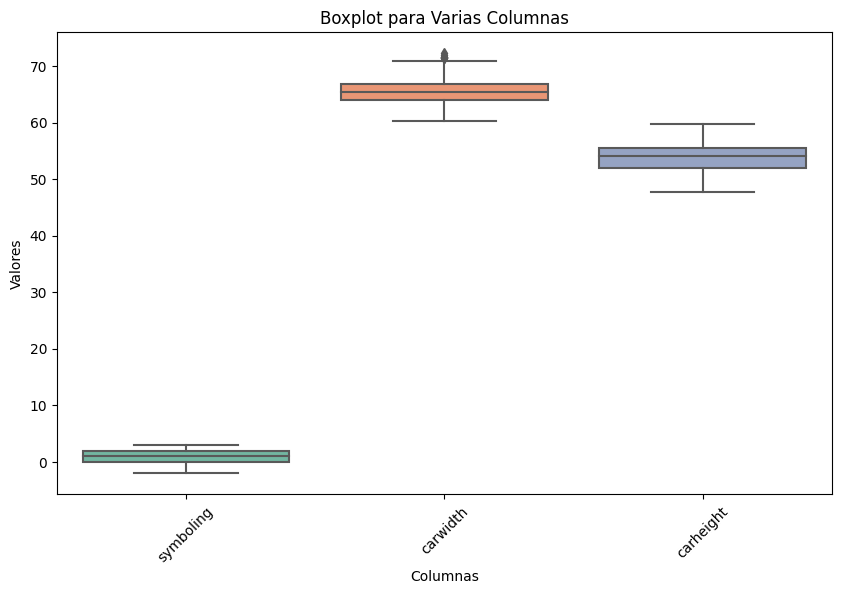

In [7]:
col2=['symboling','carwidth','carheight']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[col2], palette="Set2")
plt.title("Boxplot para Varias Columnas")
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

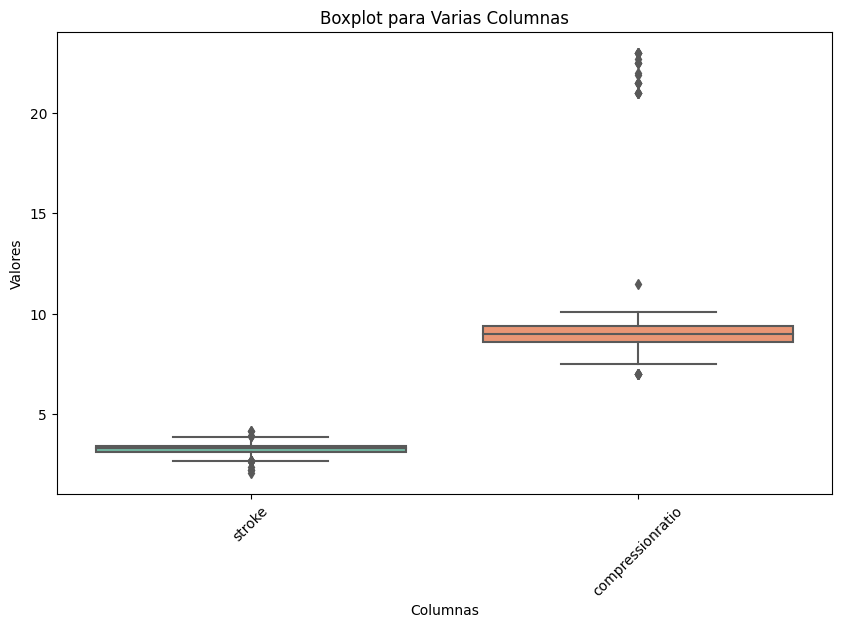

In [8]:
col3=['stroke','compressionratio']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[col3], palette="Set2")
plt.title("Boxplot para Varias Columnas")
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

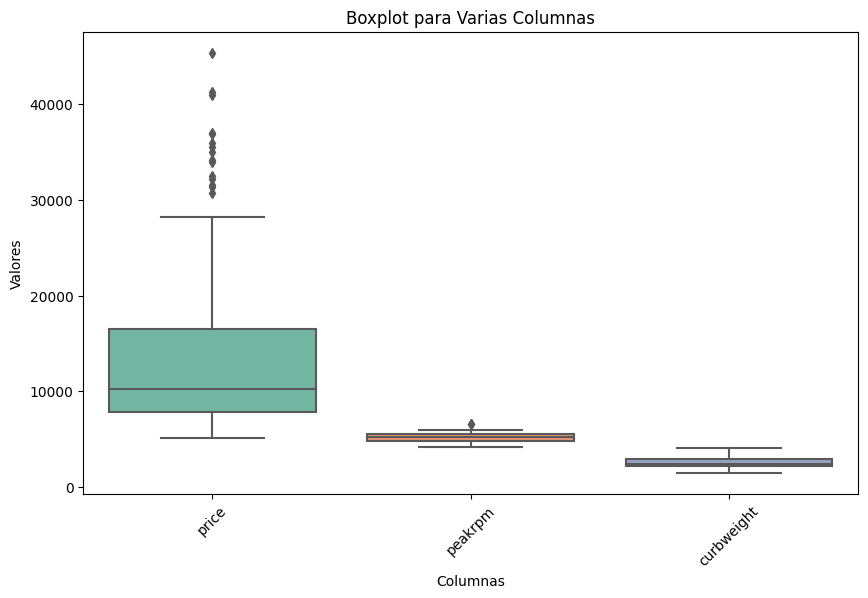

In [9]:
col4=['price','peakrpm','curbweight']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[col4], palette="Set2")
plt.title("Boxplot para Varias Columnas")
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

**Histogramas**

En estas gráficas se observa que todas las distribuciones son asimetricas, algunas incluso tienen un sesgo muy marcado como el horsepower, wheelbase, enginesize, compressionratio y el precio, que será nuestra variable a predecir.

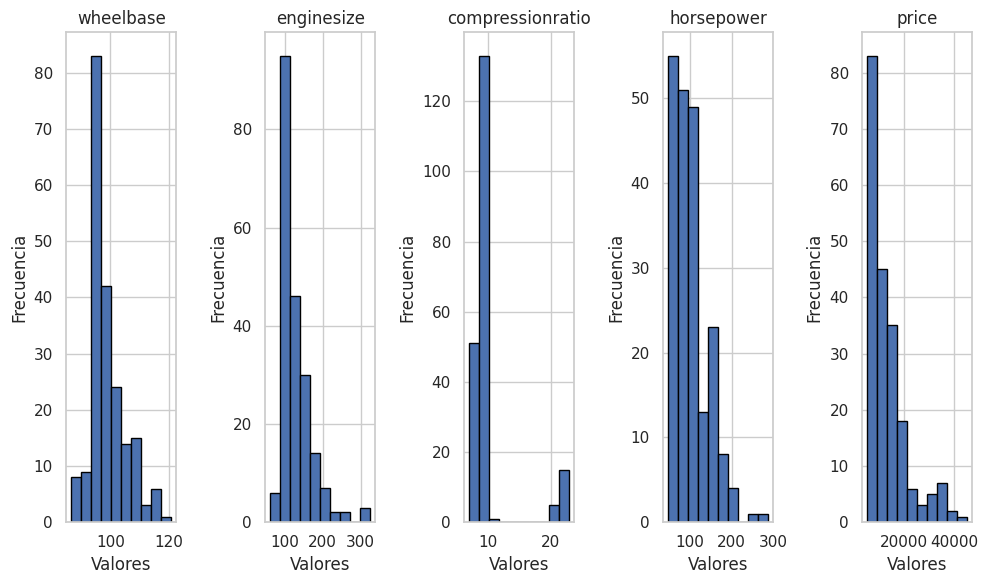

In [34]:
colums=['wheelbase','enginesize','compressionratio','horsepower','price']
plt.figure(figsize=(10, 6))
for i, col in enumerate(colums):
    plt.subplot(1, len(colums), i+1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

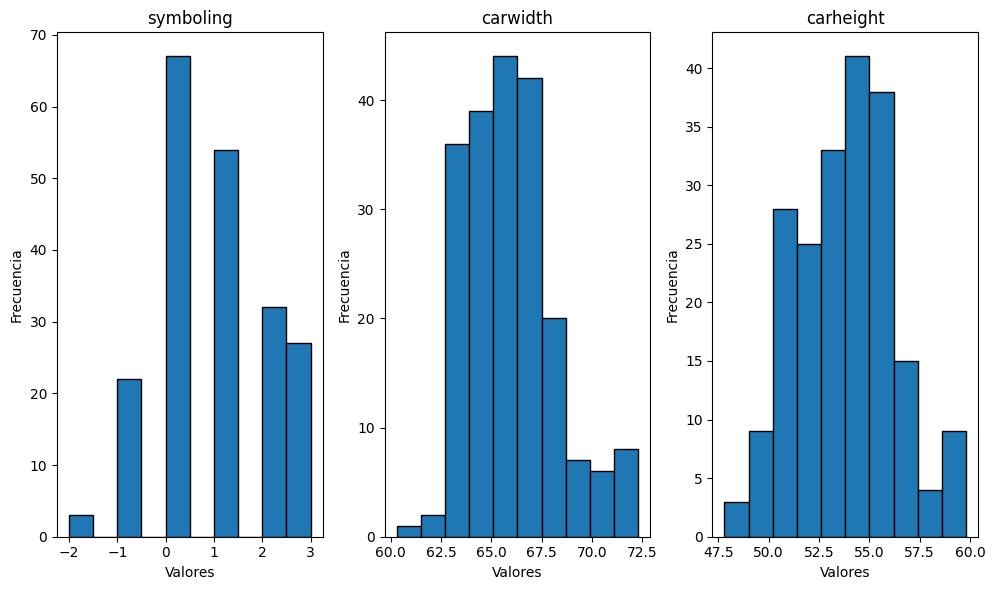

In [11]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(col2):
    plt.subplot(1, len(col2), i+1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

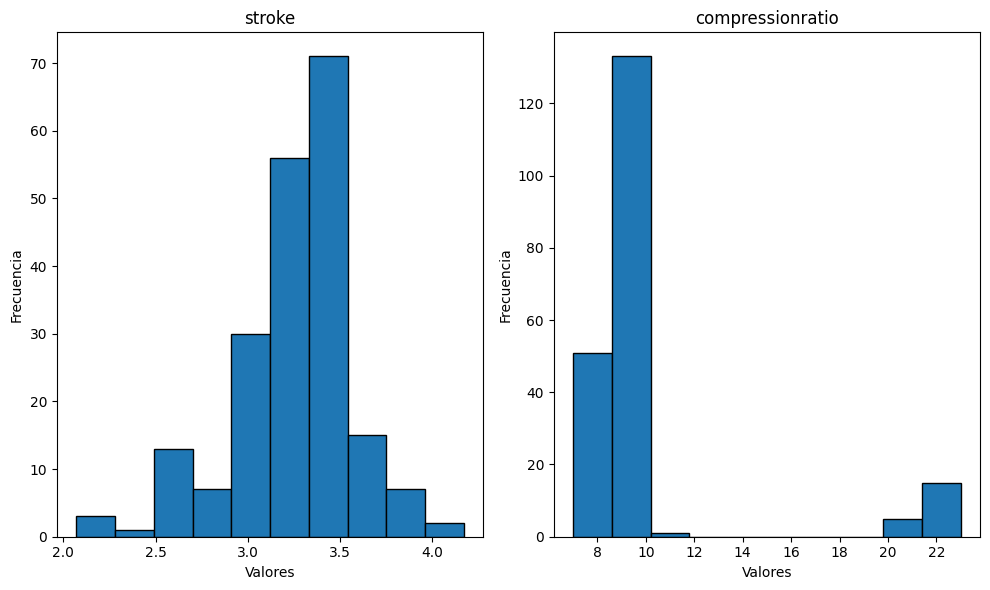

In [12]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(col3):
    plt.subplot(1, len(col3), i+1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

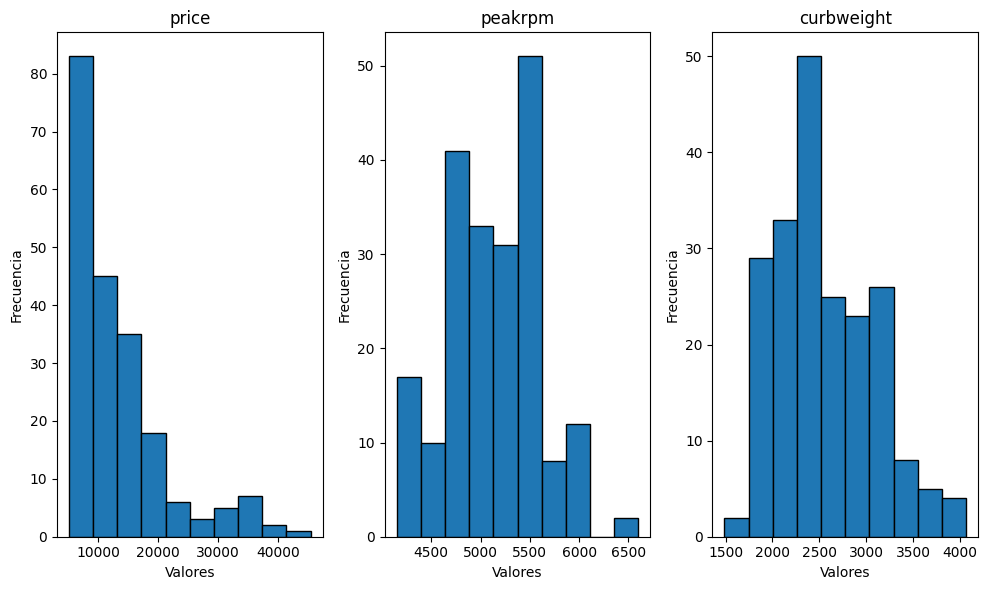

In [13]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(col4):
    plt.subplot(1, len(col4), i+1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

**Correlacion y diagramas de dispersion**

En el mapa de calor y en los diagramas de dispersion podemos identificar algunas variables que tienen una correlacion significativa con el precio, estas son: carwidth, curbweight, horsepower, enginezise, citympg, highwaympg y wheelbase.


De estas variables hay varias que estan muy correlacionadas entre si por lo que se escogieron solo algunas para predecir el precio:
- carwith
- enginesize
- citympg
- wheelbase.


In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.070873,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<ipython-input-16-0625d87e5bc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


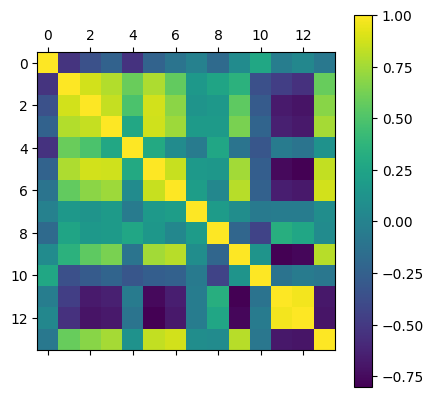

In [16]:
#variables numericas
plt.matshow(df.corr())
cb = plt.colorbar()

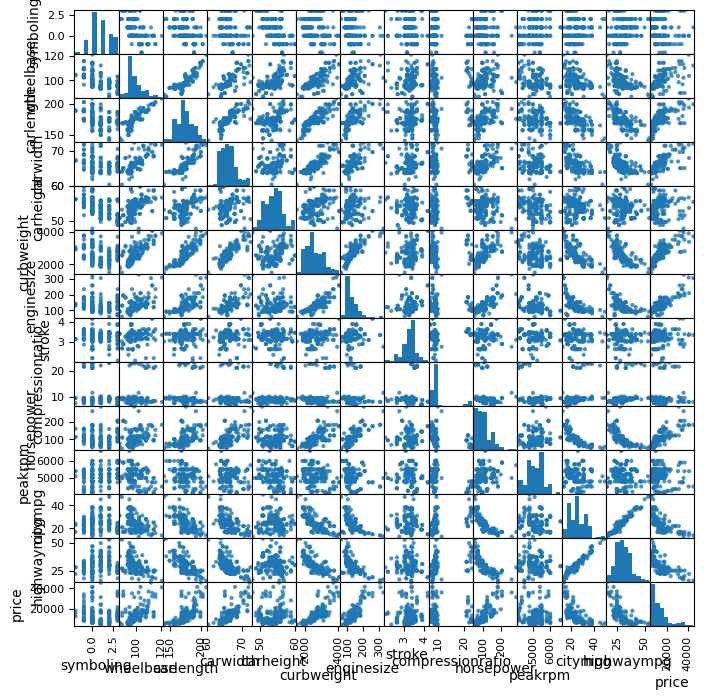

In [17]:
scatter_matrix(df, figsize=(8, 8), alpha=0.8, diagonal='hist')
plt.show()

# Variables cualitativas

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

**Grafica de frecuencias**

En las graficas observamos que hay variables que tienen desde dos a siete categorías, a exepcion de 'CarName', que tiene más de 30, por lo que en análisis posteriores esta variable no se tomará en cuenta.

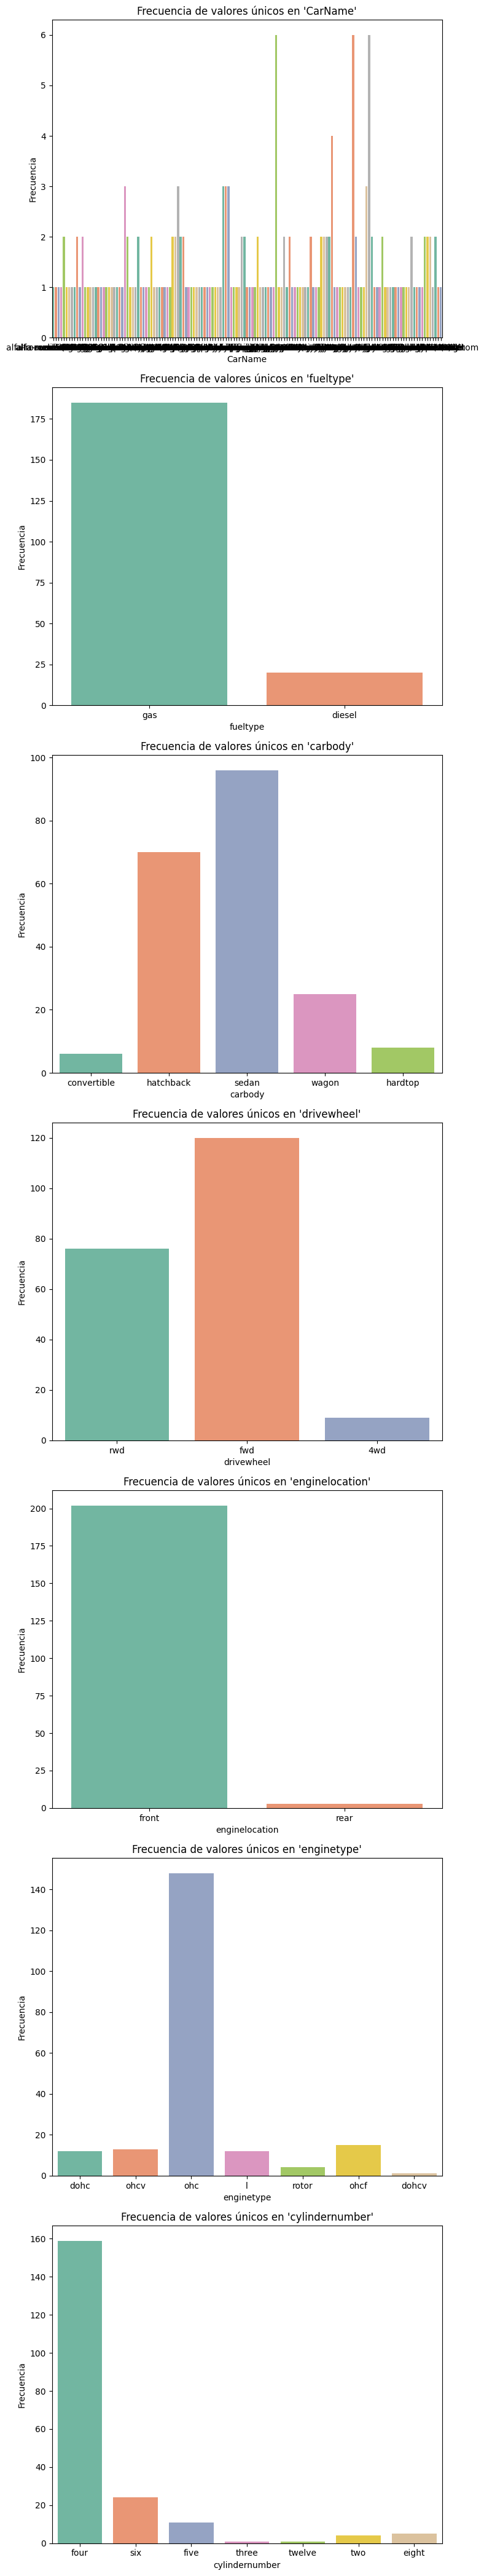

In [19]:
columns=['CarName','fueltype','carbody','drivewheel','enginelocation','enginetype','cylindernumber']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6 * len(columns)))
for i, column in enumerate(columns):
    ax = sns.countplot(data=df, x=column, ax=axes[i], palette="Set2")
    ax.set_title(f"Frecuencia de valores únicos en '{column}'")
    ax.set_xlabel(column)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

**Diagrama de pastel**

En estas graficas se puede apreciar de manera mas clara la proporcion con la que se presenta una u otra categoria dentro de una variable.

- Fueltype: la mayoría de autos usan gas y solo un porcentaje pequeño usa diesel.

- Carbody: casi la mitad de los autos son tipo sedan y otro gran porcentaje son hatchback

- drivewheel: más del 50% son tipo fwd

- enginelocation: el 98.5% son front

- enginetype: la mayoría son ohc

- cylindernumber: la mayoría tienen 4

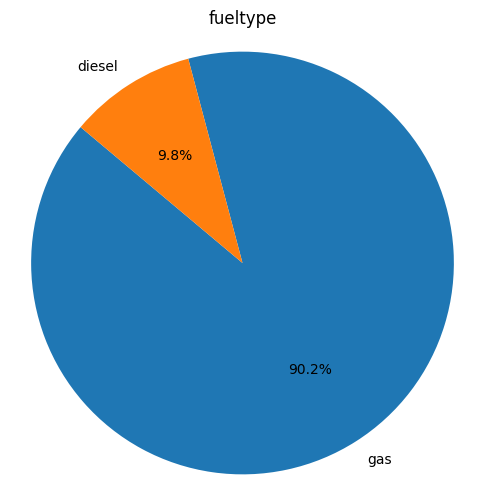

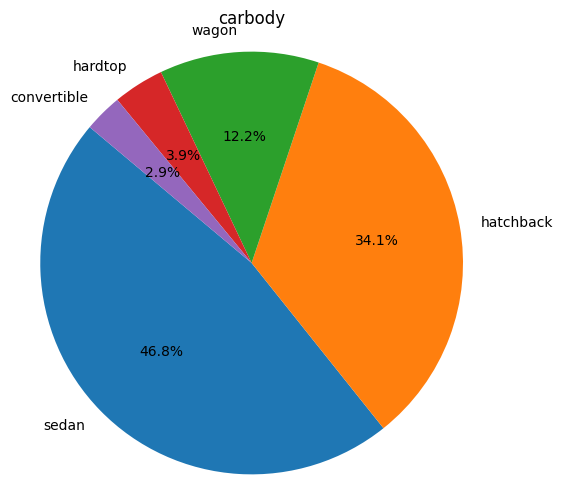

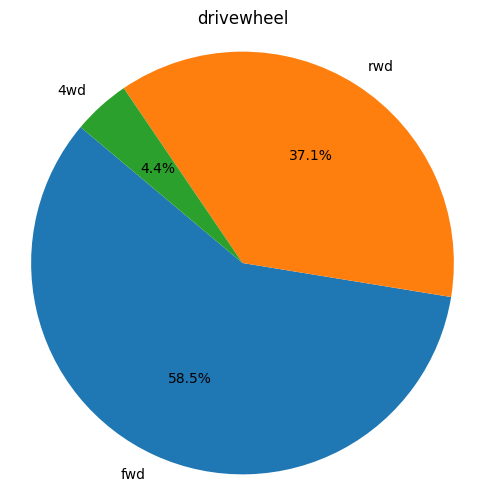

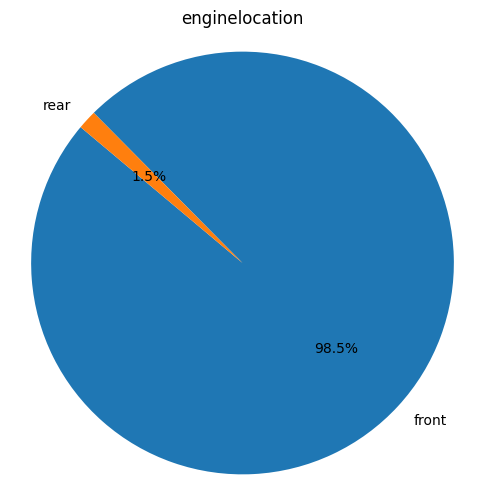

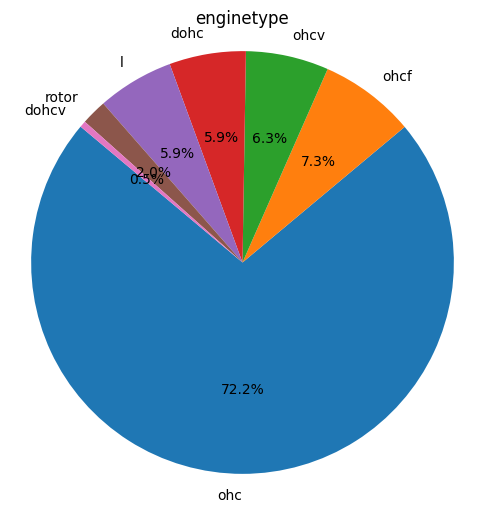

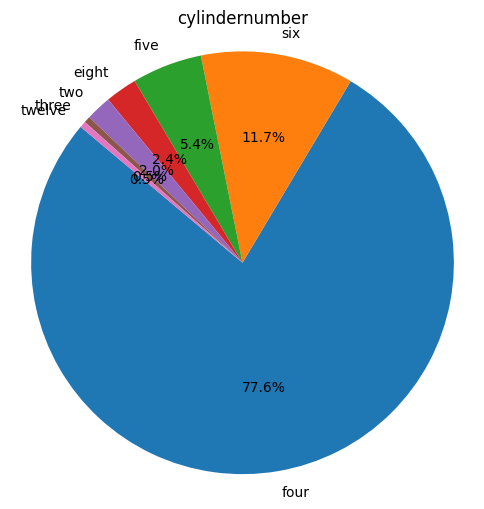

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in ['CarName']]
# Crear un diagrama de pastel para cada columna cualitativa
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'{column}')
    plt.show()

**Boxplots por categorías**

Se volvió a hacer un analisis con boxplot pero esta vez tomando en cuenta 'price' y las categorias de las variables cualitativas.

Las unicas categorias donde se encontraron una gran cantidad de outliers y datos extremos fueron de enginetype.


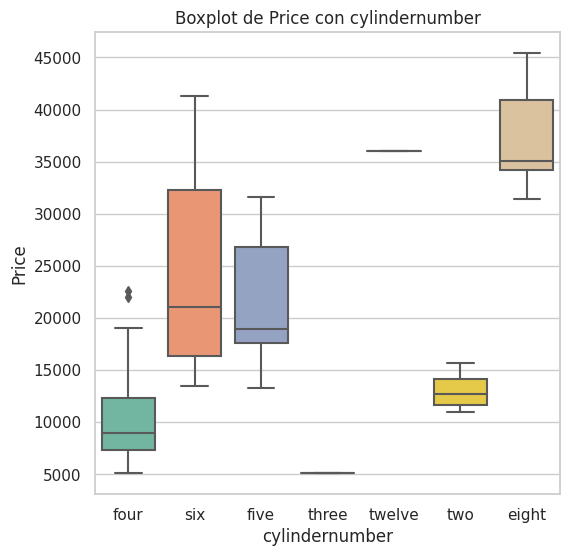

In [21]:
sns.set(style="whitegrid")

# Crear el boxplot para la variable 'price' con fueltype='gas'
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='cylindernumber', y='price', palette="Set2")
plt.title('Boxplot de Price con cylindernumber')
#plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

Enginetype:

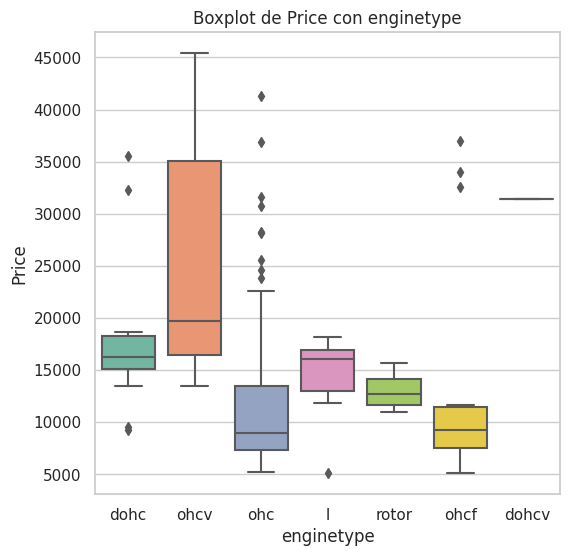

In [22]:
sns.set(style="whitegrid")

# Crear el boxplot para la variable 'price' con fueltype='gas'
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='enginetype', y='price', palette="Set2")
plt.title('Boxplot de Price con enginetype')
#plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

Enginelocation

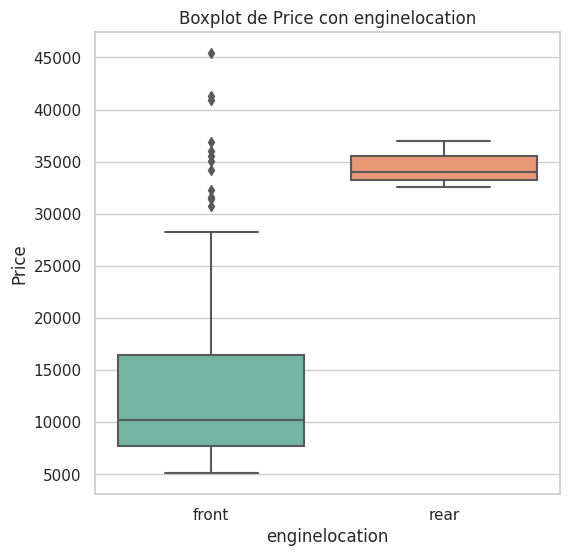

In [23]:
sns.set(style="whitegrid")

# Crear el boxplot para la variable 'price' con fueltype='gas'
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='enginelocation', y='price', palette="Set2")
plt.title('Boxplot de Price con enginelocation')
#plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

Drivewheel

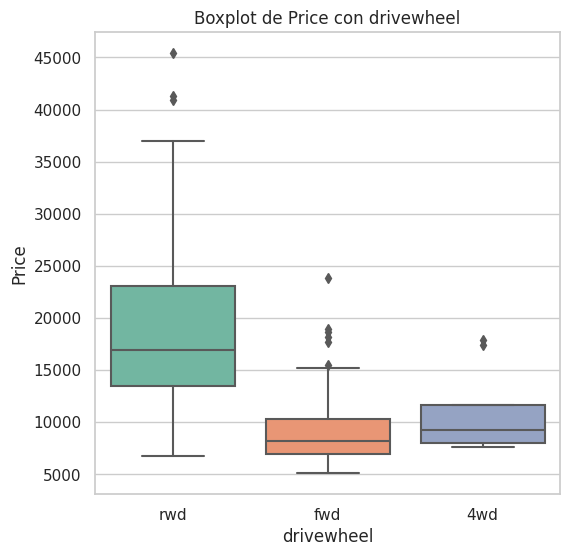

In [24]:
sns.set(style="whitegrid")

# Crear el boxplot para la variable 'price' con fueltype='gas'
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='drivewheel', y='price', palette="Set2")
plt.title('Boxplot de Price con drivewheel')
#plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

Carbody

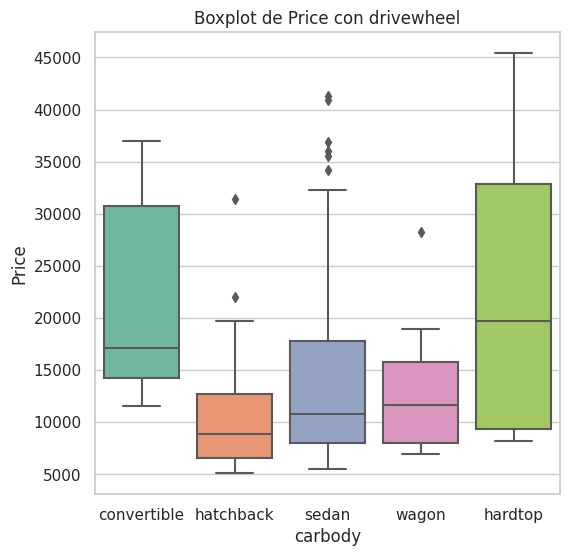

In [25]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='carbody', y='price', palette="Set2")
plt.title('Boxplot de Price con drivewheel')
#plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

Fueltype

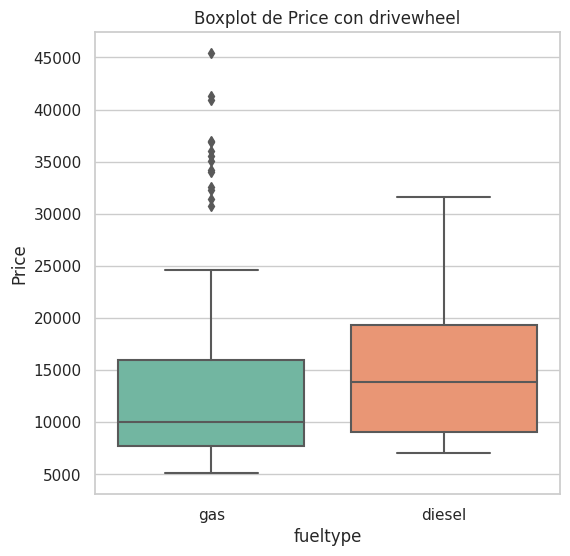

In [26]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='fueltype', y='price', palette="Set2")
plt.title('Boxplot de Price con drivewheel')
#plt.xlabel('Fueltype')
plt.ylabel('Price')
plt.show()

**Problemas de calidad de los datos:**

En el analisis exploratorio se encontró que hay muchas variables, algunas con muchos datos atipicos o extremos, y otras con mucho sesgo en su distribucion. Además, las escalas de medidas de las columnas son en algunos casos muy diferentes, lo que dificulta la comparacion entre variables.

Por otro lado, no hay valores nulos en la base de datos ni tampoco hay duplicados.

In [27]:
#datos duplicados
df[df.duplicated(keep=False)]

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [28]:
#datos faltantes (NaN)
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Elección de variables**

Después de hacer los análisis anteriores se escogieron las 6 variables, las cuaes fueron: wheelbase, carbody, cylindernumber, drivewheel, enginesize y citympg.

# **Preparación de la base de datos**



**Eliminacion de variables**

In [29]:
nuevo_df = df[['wheelbase', 'carbody','cylindernumber', 'drivewheel', 'enginesize', 'citympg','price']]

In [30]:
nuevo_df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

**Transformacion de variables categoricas**

In [31]:
nuevo_df.cylindernumber.replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4,6,5,3,12,2,8], inplace = True)

<ipython-input-31-381cbd769ce4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df.cylindernumber.replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4,6,5,3,12,2,8], inplace = True)


In [32]:
nuevo_df

,wheelbase,carbody,cylindernumber,drivewheel,enginesize,citympg,price
0,88.6,convertible,4,rwd,130,21,13495.0
1,88.6,convertible,4,rwd,130,21,16500.0
2,94.5,hatchback,6,rwd,152,19,16500.0
3,99.8,sedan,4,fwd,109,24,13950.0
4,99.4,sedan,5,4wd,136,18,17450.0
...,...,...,...,...,...,...,...
200,109.1,sedan,4,rwd,141,23,16845.0
201,109.1,sedan,4,rwd,141,19,19045.0
202,109.1,sedan,6,rwd,173,18,21485.0
203,109.1,sedan,6,rwd,145,26,22470.0
